In [53]:
# install.packages("FactoMineR", repos="https://cloud.r-project.org/")
library(FactoMineR)
library(reshape)
R.Version()$version.string

[1] "R version 3.6.1 (2019-07-05)"

In [54]:
tabl_cont_lex_large=read.csv("tabl_lex_alcaldes_ideologia.csv")
tabl_cont_lex_categorias=read.csv("tabl_lex_alcaldes_categorias.csv", row.names=1)
tabl_cont_lex_ideol=tabl_cont_lex_large[tabl_cont_lex_large$termino %in% rownames(tabl_cont_lex_categorias),]
rownames(tabl_cont_lex_ideol)=tabl_cont_lex_ideol$termino
tabl_cont_lex_ideol$Category=tabl_cont_lex_categorias$Category

In [57]:
tabl_lex_alcaldes_agg=aggregate(. ~ Category, tabl_cont_lex_ideol[,20:46], sum)
rownames(tabl_lex_alcaldes_agg)=tabl_lex_alcaldes_agg$Category
tabl_lex_alcaldes_agg=subset(tabl_lex_alcaldes_agg, select = -c(Category) )

In [84]:
lex_cont_tbl=tabl_lex_alcaldes_agg
# lex_cont_tbl=tabl_cont_lex_ideol[,20:45]
tail(lex_cont_tbl)

,Antes,Después,Arauca,Barranquilla,Bogotá,Bucaramanga,Cali,Cúcuta,Ibagué,Medellín,...,Sincelejo,Tunja,Valledupar,Villavicencio,Derecha_Centro,Izquierda_Centro,Derecha_Extrema,Izquierda_Extrema,Derecha,Izquierda
Family,82,257,5,21,44,20,15,5,14,28,...,34,21,15,13,79,138,69,53,148,191
Health,151,514,2,30,112,47,45,10,27,69,...,16,30,18,53,124,335,79,127,203,462
Home,128,335,2,32,96,18,29,8,5,25,...,19,16,21,43,90,206,78,89,168,295
Negative emotions,44,104,0,11,28,6,21,6,8,14,...,5,9,10,9,37,80,14,17,51,97
Positive emotions,870,1060,30,121,321,74,115,41,54,163,...,82,75,66,169,397,848,248,437,645,1285
Sadness,13,125,3,20,7,4,20,3,4,19,...,4,9,18,4,46,66,14,12,60,78


In [85]:
colnames(lex_cont_tbl)

[1] "Antes"             "Después"           "Arauca"           
 [4] "Barranquilla"      "Bogotá"            "Bucaramanga"      
 [7] "Cali"              "Cúcuta"            "Ibagué"           
[10] "Medellín"          "Montería"          "Neiva"            
[13] "Pasto"             "Popayán"           "Riohacha"         
[16] "Santa.Marta"       "Sincelejo"         "Tunja"            
[19] "Valledupar"        "Villavicencio"     "Derecha_Centro"   
[22] "Izquierda_Centro"  "Derecha_Extrema"   "Izquierda_Extrema"
[25] "Derecha"           "Izquierda"

In [86]:
ca2 = CA(lex_cont_tbl, graph = FALSE)

In [87]:
summary(ca2)
summary(ca2, nbelements=Inf, file="out_CA.txt")
desc_tab=dimdesc(ca2)


Call:
CA(X = lex_cont_tbl, graph = FALSE) 

The chi square of independence between the two variables is equal to 803.172 (p-value =  3.310984e-73 ).

Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.013   0.006   0.005   0.002   0.002   0.002   0.001
% of var.             41.734  18.824  16.109   7.046   6.298   5.457   3.004
Cumulative % of var.  41.734  60.559  76.667  83.713  90.010  95.467  98.471
                       Dim.8
Variance               0.000
% of var.              1.529
Cumulative % of var. 100.000

Rows
                    Iner*1000    Dim.1    ctr   cos2    Dim.2    ctr   cos2  
Achievements      |     2.809 |  0.058 10.695  0.476 |  0.033  7.604  0.153 |
Anger             |     3.029 | -0.038  0.392  0.016 | -0.212 26.772  0.499 |
Anxiety           |     1.228 | -0.105  1.620  0.165 | -0.143  6.598  0.303 |
Family            |     4.618 | -0.181 13.220  0.358 |  0.123 13.569  0.166 |
Health           

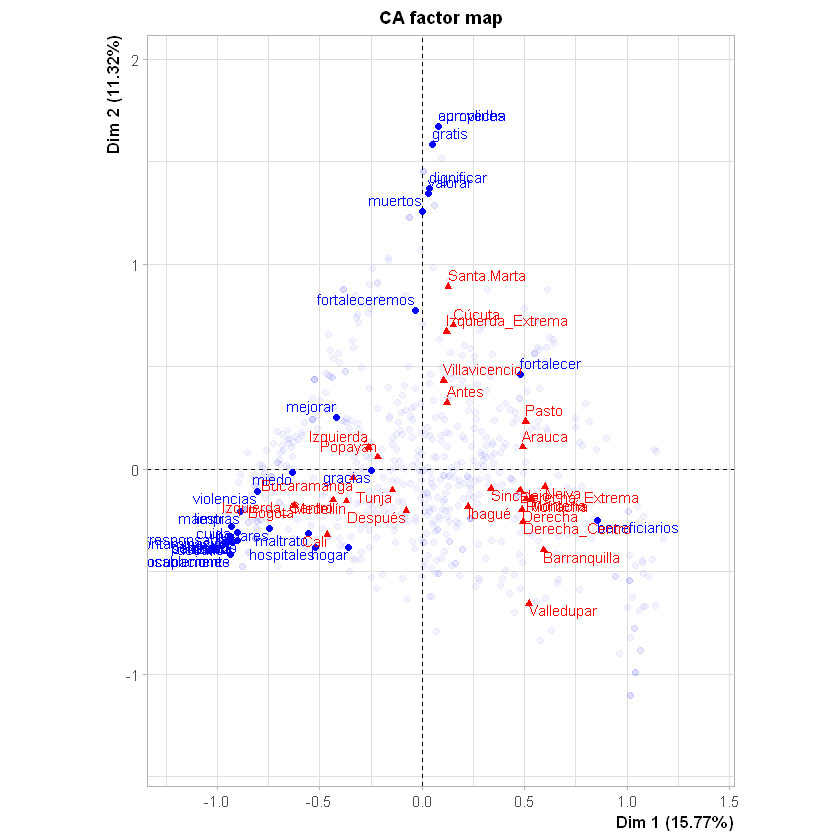

In [83]:
plot(ca2,
    shadowtext=TRUE,
    unselect=.95,
    cex=.8,
    selectRow="cos2 30"
    )

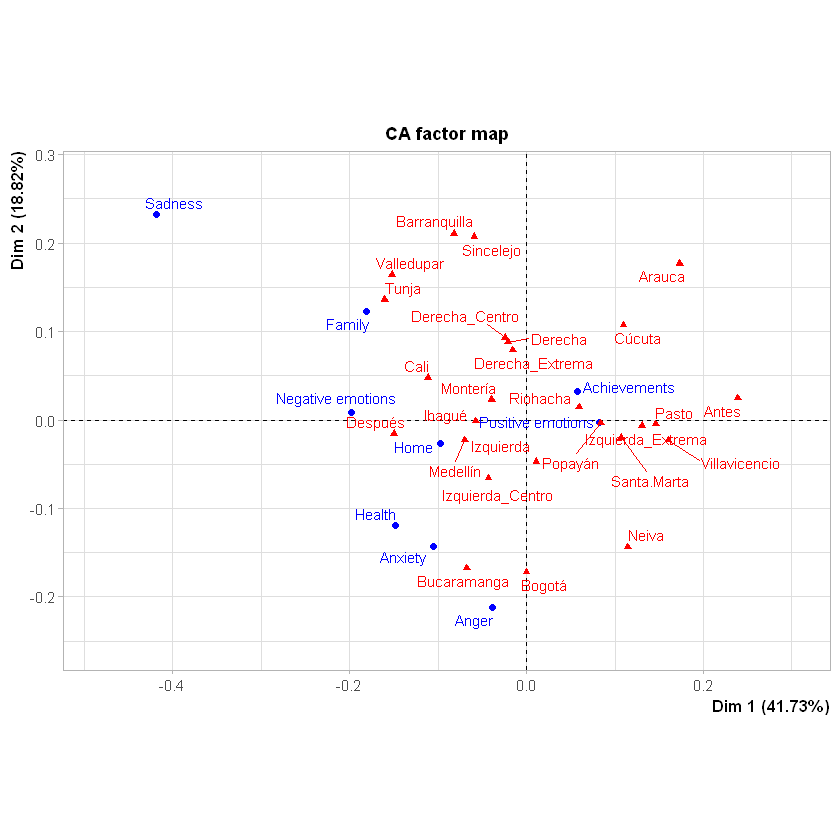

In [88]:
plot(ca2,
    shadowtext=TRUE,
    unselect=.95,
    cex=.8,
    selectRow="contrib 30"
    )

In [93]:
# pdf("ca_alcaldes_top5.pdf", width = 12, height = 12)
pdf("ca_alcaldes.pdf", width = 12, height = 12)

plot(ca2,
    shadowtext=TRUE,
    unselect=.9,
    cex=.15,
    )
dev.off()


png 
  2

In [95]:
# pdf("ca_alcaldes_top5_contrib_100.pdf", width = 12, height = 12)
pdf("ca_alcaldes_contrib_100.pdf", width = 12, height = 12)

plot(ca2,
    shadowtext=TRUE,
    unselect=.9,
    cex=.25,
    selectRow="contrib 100"
    )
dev.off()


png 
  2

In [96]:
# pdf("ca_alcaldes_top5_cos2_100.pdf", width = 12, height = 12)
pdf("ca_alcaldes_cos2_100.pdf", width = 12, height = 12)

plot(ca2,
    shadowtext=TRUE,
    unselect=.95,
    cex=.5,
    selectRow="cos2 100"
    )
dev.off()


png 
  2

In [89]:
coords=rbind(data.frame(ca2$col$coord[,c(1,2,3)]),data.frame(ca2$row$coord[,c(1,2,3)]))
colnames(coords)=c("x_pos","y_pos","z_pos")

In [93]:
write.csv(lex_cont_tbl, "lex_cont_tbl_output_R.csv", fileEncoding ="UTF-8")
write.csv(coords, "nodes_coords.csv", fileEncoding ="UTF-8")

In [94]:
coords

,x_pos,y_pos,z_pos
Antes,0.2387988380,0.024720483,-0.0367587459
Después,-0.1495174079,-0.015478059,0.0230154906
Arauca,0.1732774793,0.176924283,-0.0677167436
Barranquilla,-0.0817606542,0.210939987,-0.0314471081
Bogotá,-0.0002052283,-0.172148630,0.0377115038
Bucaramanga,-0.0678428085,-0.167498220,-0.0664313026
Cali,-0.1114802167,0.047953940,-0.1884168700
Cúcuta,0.1095940194,0.107071657,-0.1613972889
Ibagué,-0.0575259125,-0.001242668,-0.0764970285
Medellín,-0.0700714244,-0.022948257,-0.0835973244
